In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:

%load_ext autoreload
%autoreload 2
from Layers import *
from Data import *
from Model import *

##### Note : When we uploaded the data , all the testing and the training labels were zeros, thus our model almost overfitted . So we tried to enter random training & testing numbers (0-1) then (0-9) to  observe training of our model in a better way, but didn't do well in testing as the labels are totally random ( no relation between inouts and labels for model to generalize on testing by learning or trying to figure it out )

In [4]:
train_path = '/content/sample_data/mnist_train_small.csv'
test_path = '/content/sample_data/mnist_test.csv'

In [14]:
img_data = Image(path = train_path,test_frac = 0.8,val_frac = 0.195,image_size=(28,28), colour = 'gray')
img_data_test = Image(path = test_path,test_frac = 0.8,val_frac = 0.195,image_size=(28,28), colour = 'gray')
train_data = img_data.train_data
test_data = img_data_test.test_data


In [16]:
weights = np.random.random((10,784))
bias = np.random.random((10,1))

train_data = np.reshape(train_data,(100,1,784))
train_data = np.reshape(train_data,(100,784))
train_data = np.reshape(train_data,(784,100))
test_data = np.reshape(test_data,(784,-1))
test_data = test_data[:,0:100]

train_labels = img_data.train_labels
test_labels = img_data.test_labels

train_labels = np.reshape(train_labels,(1,100))
test_labels = np.reshape(test_labels,(1,15999))
test_labels = test_labels[:,0:100]


iterations : 
 1 
 weights : 
[[0.5343678  0.72290949 0.05777482 ... 0.49358294 1.00916923 0.71972386]
 [0.25539015 0.21374654 0.30746627 ... 0.14364189 0.61298528 0.07085326]
 [0.47467939 0.70966554 0.04174982 ... 0.58920998 0.11123745 0.67321694]
 ...
 [0.19532143 0.75477592 0.7596085  ... 0.63795574 0.02505835 0.05849905]
 [0.14793437 0.78461201 0.74476145 ... 0.63419    0.05817934 0.02677804]
 [0.16529072 0.12034064 0.31174412 ... 0.53912607 0.77921938 0.55445988]] 
 bias : 
 [[0.85548366]
 [0.15352965]
 [0.59497754]
 [0.83873022]
 [0.78281966]
 [0.67035427]
 [0.14106172]
 [0.09760688]
 [0.69301105]
 [0.51629199]]

 Loss : 6.907755278982137
accuracy  :  0.0


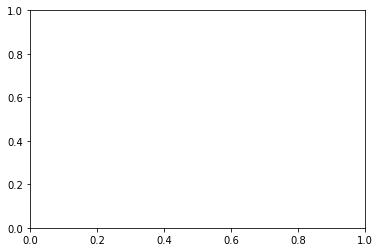

Streaming output truncated to the last 5000 lines.
 [0.63772596]
 [0.07970464]
 [0.07124864]
 [0.66569929]
 [0.43524116]]

 Loss : 3.79702258701846e-06
accuracy  :  1.0
iterations : 
 293 
 weights : 
[[0.5343678  0.74509026 0.138788   ... 0.61116919 1.10772499 0.71972386]
 [0.25539015 0.21371832 0.30694234 ... 0.14329296 0.61250311 0.07085326]
 [0.47467939 0.70889035 0.04035539 ... 0.58193856 0.10959915 0.67321694]
 ...
 [0.19532143 0.74881746 0.75924079 ... 0.63524929 0.02479412 0.05849905]
 [0.14793437 0.78456526 0.7361516  ... 0.62733973 0.0511752  0.02677804]
 [0.16529072 0.1198618  0.30007673 ... 0.52364776 0.75470827 0.55445988]] 
 bias : 
 [[1.46768234]
 [0.13148158]
 [0.54105592]
 [0.77353915]
 [0.74048846]
 [0.6377259 ]
 [0.07970449]
 [0.07124857]
 [0.6656992 ]
 [0.43524102]]

 Loss : 3.7969672732769014e-06
accuracy  :  1.0
iterations : 
 294 
 weights : 
[[0.5343678  0.74509027 0.13878806 ... 0.61116936 1.10772507 0.71972386]
 [0.25539015 0.21371832 0.30694234 ... 0.14329296

In [17]:

Layer1 = Linear(train_data, weights, bias, 'softmax')
my_Model1 = Model([Layer1])


# Layer1()
my_Loss = my_Model1.Loss(train_labels, Layer1.output()).CrossEntropy()
opt = my_Model1.Optimization(500, my_Loss, 0.1, 0.02,'Batch').Momentum()

In [18]:
my_Model1.Evaluate(test_data, test_labels, True)

Y_Hat : [[-3.49583173e-02 -1.48521985e-03 -2.37726578e-04 -3.72343161e-04
  -1.21526178e-04 -1.37749297e-04 -1.09430219e-04 -2.05661981e-04
  -3.82066651e-04 -1.24529505e-03 -2.45188731e-03 -3.54722436e-03
  -2.66084965e-03 -2.44494752e-02 -3.16201433e-02 -5.66549872e-03
  -1.58709934e-05 -1.85832261e-05 -3.44578146e-04 -2.61953644e-04
  -1.44419032e-03 -1.48398038e-02 -1.45098021e-02 -8.53125199e-03
  -5.06320079e-03 -2.97407795e-03 -3.75386555e-03 -8.69992475e-03
  -8.72151457e-03 -7.91178968e-04 -2.25503058e-05 -1.00738804e-04
  -3.16931526e-05 -9.80862044e-05 -1.97842541e-04 -1.91067275e-03
  -3.53931584e-03 -3.25628856e-02 -1.44543685e-01 -2.54630132e-02
  -3.69709419e-02 -5.14740578e-02 -1.59133545e-01 -4.03898802e-03
  -3.59398621e-05 -1.18893949e-04 -6.70010228e-04 -3.13926142e-03
  -1.11162907e-02 -1.78667914e-01 -1.04840507e-01 -2.70034247e-02
  -1.26030369e-02 -2.57910883e-03 -2.25990983e-03 -1.24119514e-03
  -8.24015357e-04 -1.81922274e-04 -3.35870230e-05 -6.18045021e-05
  

(array([[-3.49583173e-02, -1.48521985e-03, -2.37726578e-04,
         -3.72343161e-04, -1.21526178e-04, -1.37749297e-04,
         -1.09430219e-04, -2.05661981e-04, -3.82066651e-04,
         -1.24529505e-03, -2.45188731e-03, -3.54722436e-03,
         -2.66084965e-03, -2.44494752e-02, -3.16201433e-02,
         -5.66549872e-03, -1.58709934e-05, -1.85832261e-05,
         -3.44578146e-04, -2.61953644e-04, -1.44419032e-03,
         -1.48398038e-02, -1.45098021e-02, -8.53125199e-03,
         -5.06320079e-03, -2.97407795e-03, -3.75386555e-03,
         -8.69992475e-03, -8.72151457e-03, -7.91178968e-04,
         -2.25503058e-05, -1.00738804e-04, -3.16931526e-05,
         -9.80862044e-05, -1.97842541e-04, -1.91067275e-03,
         -3.53931584e-03, -3.25628856e-02, -1.44543685e-01,
         -2.54630132e-02, -3.69709419e-02, -5.14740578e-02,
         -1.59133545e-01, -4.03898802e-03, -3.59398621e-05,
         -1.18893949e-04, -6.70010228e-04, -3.13926142e-03,
         -1.11162907e-02, -1.78667914e-0

In [19]:
train_labels = np.random.randint(0,1,(1,100),int)
test_labels = np.random.randint(0,1,(1,100),int)

alpha :  0.1
iterations : 1 
 weights : 
[[0.53591418 0.74837273 0.62475167 ... 0.71703083 0.80185999 0.25564663]
 [0.93305292 0.91113755 0.35152299 ... 0.30613872 0.4984793  0.22105879]
 [0.95240218 0.9443519  0.50656221 ... 0.63010023 0.68842226 0.11812363]
 ...
 [0.1285156  0.00331105 0.53735378 ... 0.62428018 0.17435738 0.72177898]
 [0.27906313 0.72680675 0.61460071 ... 0.24662749 0.70045678 0.08413249]
 [0.23936546 0.83480815 0.32217433 ... 0.60927555 0.22685992 0.5162373 ]] 
 bias : 
 [[0.62251489]
 [0.91814699]
 [0.89179488]
 [0.21321488]
 [0.38146822]
 [0.1616618 ]
 [0.25024738]
 [0.2900476 ]
 [0.65271962]
 [0.93946497]]

 Loss : 6.907755278982137
accuracy  :  0.23


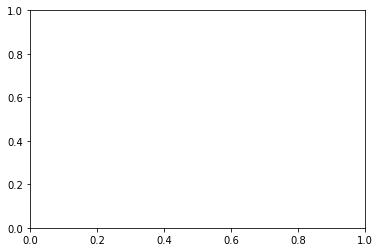

Streaming output truncated to the last 5000 lines.
 [0.11455242]
 [0.21164383]
 [0.24258728]
 [0.62076514]
 [0.88073128]]
alpha :  0.1
iterations : 1 
 weights : 
[[0.53591418 0.75787982 0.66105052 ... 0.77556062 0.85031108 0.25564663]
 [0.93305292 0.91106121 0.34625771 ... 0.30182455 0.4948423  0.22105879]
 [0.95240218 0.94434651 0.50496917 ... 0.62807879 0.68450376 0.11812363]
 ...
 [0.1285156  0.0032248  0.53264734 ... 0.62058316 0.16423243 0.72177898]
 [0.27906313 0.72405908 0.61008553 ... 0.2399873  0.6960516  0.08413249]
 [0.23936546 0.83366449 0.32015867 ... 0.60139604 0.22619365 0.5162373 ]] 
 bias : 
 [[1.01237518]
 [0.90114992]
 [0.88271934]
 [0.1997003 ]
 [0.35510864]
 [0.11454053]
 [0.21163598]
 [0.24257326]
 [0.62075684]
 [0.88072124]]

 Loss : 0.0028173541995555086
accuracy  :  1.0
//////////// end of iteration
epoch : 390 
 weights : 
[[0.53591418 0.75787982 0.66105052 ... 0.77556062 0.85031108 0.25564663]
 [0.93305292 0.91106121 0.34625771 ... 0.30182455 0.4948423  0.22

In [20]:
weights = np.random.random((10,784))
bias = np.random.random((10,1))

Layer1 = Linear(train_data, weights, bias, 'softmax')
my_Model2 = Model([Layer1])


# Layer1()
my_Loss = my_Model2.Loss(train_labels, Layer1.output()).CrossEntropy()
opt = my_Model2.Optimization(500, my_Loss, 0.1, 0.02,'Batch').GradientDescent()

In [21]:
my_Model2.Evaluate(test_data, test_labels, True)

Y_Hat : [[-4.96495958e-04 -3.47194391e-03 -2.59663586e-02 -3.83615118e-04
  -9.33382639e-04 -8.12714042e-05 -5.90838165e-05 -2.12435827e-05
  -1.73687044e-04 -3.26148639e-03 -8.82224515e-03 -9.76959078e-03
  -9.29109949e-03 -1.33698621e-02 -4.95773840e-02 -6.62359094e-02
  -2.78068336e-03 -6.16777749e-03 -7.82117914e-03 -8.85344652e-02
  -2.10847313e-01 -4.20890508e-02 -1.52409234e-03 -5.51495597e-04
  -7.23186127e-03 -3.59392820e-03 -1.57075765e-03 -3.13328712e-04
  -3.22604932e-04 -1.81792494e-03 -1.34837685e-02 -2.87805188e-03
  -4.43476342e-03 -2.09076885e-04 -6.99656561e-04 -1.80827575e-03
  -6.23127401e-03 -5.85900318e-03 -3.62060859e-02 -5.88592574e-03
  -2.43766926e-02 -1.57189862e-01 -8.79198361e-01 -7.65612962e-01
  -3.25575696e-01 -3.69807632e-02 -4.25366856e-02 -5.42754118e-02
  -1.37779395e-01 -3.63403397e-03 -3.03938435e-04 -3.19952211e-04
  -1.29224577e-02 -4.87656156e-02 -2.15396808e-02 -2.38849665e-03
  -2.44946937e-03 -1.00580175e-02 -1.23212163e-02 -1.51031569e-03
  

(array([[-4.96495958e-04, -3.47194391e-03, -2.59663586e-02,
         -3.83615118e-04, -9.33382639e-04, -8.12714042e-05,
         -5.90838165e-05, -2.12435827e-05, -1.73687044e-04,
         -3.26148639e-03, -8.82224515e-03, -9.76959078e-03,
         -9.29109949e-03, -1.33698621e-02, -4.95773840e-02,
         -6.62359094e-02, -2.78068336e-03, -6.16777749e-03,
         -7.82117914e-03, -8.85344652e-02, -2.10847313e-01,
         -4.20890508e-02, -1.52409234e-03, -5.51495597e-04,
         -7.23186127e-03, -3.59392820e-03, -1.57075765e-03,
         -3.13328712e-04, -3.22604932e-04, -1.81792494e-03,
         -1.34837685e-02, -2.87805188e-03, -4.43476342e-03,
         -2.09076885e-04, -6.99656561e-04, -1.80827575e-03,
         -6.23127401e-03, -5.85900318e-03, -3.62060859e-02,
         -5.88592574e-03, -2.43766926e-02, -1.57189862e-01,
         -8.79198361e-01, -7.65612962e-01, -3.25575696e-01,
         -3.69807632e-02, -4.25366856e-02, -5.42754118e-02,
         -1.37779395e-01, -3.63403397e-0

In [22]:

train_labels = ((np.random.random((1,100))) * 2).astype(int)
train_labels = np.random.randint(0,9,(1,100),int)
test_labels = np.reshape(train_labels,(1,100))
test_labels = np.random.randint(0,9,(1,100),int)




alpha :  0.1
iterations : 1 
 weights : 
[[0.1189666  0.79299247 0.16097414 ... 0.8596782  0.61146477 0.00112405]
 [0.84441973 0.33487042 0.74468254 ... 0.57376057 0.40446931 0.5687863 ]
 [0.64422821 0.65313299 0.05248122 ... 0.71124534 0.98023554 0.59559865]
 ...
 [0.70474146 0.67910869 0.5959122  ... 0.9561577  0.05538306 0.17145059]
 [0.40263562 0.68313225 0.23342581 ... 0.55191606 0.60033879 0.17735749]
 [0.4923335  0.94856549 0.38506954 ... 0.39900653 0.30957777 0.4412694 ]] 
 bias : 
 [[0.02004721]
 [0.29812878]
 [0.90299229]
 [0.42968859]
 [0.98801072]
 [0.41330796]
 [0.26639082]
 [0.50323246]
 [0.36654429]
 [0.5868014 ]]

 Loss : 6.907755278982137
accuracy  :  0.09


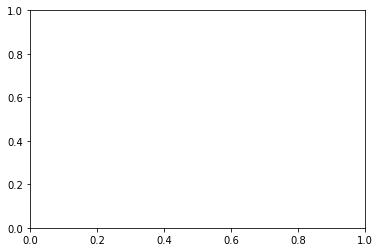

Streaming output truncated to the last 5000 lines.
 bias : 
 [[0.12868257]
 [0.30234085]
 [0.85030956]
 [0.4633528 ]
 [1.01326452]
 [0.48462322]
 [0.28680608]
 [0.61508796]
 [0.2985016 ]
 [0.43217535]]

 Loss : 0.16986063503299242
accuracy  :  1.0
//////////// end of iteration
epoch : 413 
 weights : 
[[ 1.18966598e-01  8.74038679e-01  9.95332024e-02 ...  7.53321892e-01
   6.49690846e-01  1.12405317e-03]
 [ 8.44419734e-01  4.44692549e-01  7.15306661e-01 ...  5.25906461e-01
   6.55722662e-01  5.68786298e-01]
 [ 6.44228212e-01  6.26648940e-01  1.06202348e-01 ...  7.66980474e-01
   1.19357078e+00  5.95598648e-01]
 ...
 [ 7.04741461e-01  6.10576355e-01  6.58958496e-01 ...  1.06972088e+00
   8.51800798e-03  1.71450587e-01]
 [ 4.02635618e-01  7.91941721e-01 -3.28520291e-02 ...  4.99770409e-01
   6.63144765e-01  1.77357494e-01]
 [ 4.92333505e-01  9.47894617e-01  3.66689324e-01 ...  3.74150853e-01
   2.78986485e-01  4.41269398e-01]] 
 bias : 
 [[0.12868257]
 [0.30234085]
 [0.85030956]
 [0.4633

In [23]:
weights = np.random.random((10,784))
bias = np.random.random((10,1))
Layer1 = Linear(train_data, weights, bias, 'softmax')
my_Model3 = Model([Layer1])


# Layer1()
my_Loss = my_Model3.Loss(train_labels, Layer1.output()).CrossEntropy()
opt = my_Model3.Optimization(500, my_Loss, 0.1, 0.02,'Batch').GradientDescent()

In [24]:
my_Model3.Evaluate(test_data, test_labels, True)

Y_Hat : [[-9.45203368e-01  6.70623752e-03 -9.98352560e-01  1.15745898e-02
   3.93288819e-02 -9.42048101e-01  6.99938348e-01  7.12263946e-01
   4.74494349e-01  8.68124735e-02  2.74189582e-02  1.25443988e-01
   5.23353226e-03  4.77688975e-04  3.98839088e-02 -2.70715960e-01
  -3.87826630e-03  9.63690068e-01  1.52000507e-01  8.49405140e-02
   4.45939009e-03  1.42990250e-02  7.72887676e-02  3.25464108e-02
   6.03169275e-02  2.01401606e-01  2.10538229e-01  5.38342310e-02
   3.79700195e-02  8.94805653e-03  1.70442989e-03  2.09111828e-02
   4.98636390e-02  2.71474659e-02  5.91844072e-02  1.49894301e-01
   3.52140549e-02  3.08236510e-02  6.20258808e-02  3.45449531e-02
   2.25017993e-03  3.90693124e-04  7.60367060e-03  2.25273683e-01
   9.91088443e-01  9.52835184e-01  5.51853882e-01  6.61385235e-02
   3.11854004e-03  6.60312690e-02  1.23431445e-02  3.05744679e-02
   1.63023892e-01  5.40331304e-01  7.70173705e-01  3.86279381e-02
   7.78563142e-02 -9.66099204e-01 -9.90506273e-01  1.34260603e-02
  

(array([[-9.45203368e-01,  6.70623752e-03, -9.98352560e-01,
          1.15745898e-02,  3.93288819e-02, -9.42048101e-01,
          6.99938348e-01,  7.12263946e-01,  4.74494349e-01,
          8.68124735e-02,  2.74189582e-02,  1.25443988e-01,
          5.23353226e-03,  4.77688975e-04,  3.98839088e-02,
         -2.70715960e-01, -3.87826630e-03,  9.63690068e-01,
          1.52000507e-01,  8.49405140e-02,  4.45939009e-03,
          1.42990250e-02,  7.72887676e-02,  3.25464108e-02,
          6.03169275e-02,  2.01401606e-01,  2.10538229e-01,
          5.38342310e-02,  3.79700195e-02,  8.94805653e-03,
          1.70442989e-03,  2.09111828e-02,  4.98636390e-02,
          2.71474659e-02,  5.91844072e-02,  1.49894301e-01,
          3.52140549e-02,  3.08236510e-02,  6.20258808e-02,
          3.45449531e-02,  2.25017993e-03,  3.90693124e-04,
          7.60367060e-03,  2.25273683e-01,  9.91088443e-01,
          9.52835184e-01,  5.51853882e-01,  6.61385235e-02,
          3.11854004e-03,  6.60312690e-0

In [25]:
train_labels = np.random.randint(0,7,(1,100),int)
test_labels = np.copy(train_labels) + np.random.randint(0,2,(1,100),int)




alpha :  0.1
iterations : 1 
 weights : 
[[ 2.59531608e-01  2.29839076e-01  8.74270141e-03 ...  3.31512004e-01
   7.92971529e-01  5.93682958e-01]
 [ 7.25371471e-01  5.37318944e-01 -1.37494673e-04 ...  3.01369429e-01
   2.06457599e-01  2.86131738e-02]
 [ 5.34064916e-01  4.38404296e-03  1.53072233e-01 ...  1.01085199e-01
   7.59452641e-01  7.46368429e-01]
 ...
 [ 8.70156905e-04  2.33645311e-02  3.20988928e-01 ...  8.38446364e-01
   6.09675657e-01  8.60864388e-01]
 [ 8.29845707e-02  2.15242410e-01  2.66530386e-01 ...  7.85932237e-01
   8.43479502e-01  5.79477714e-01]
 [ 3.62958989e-01  4.51107631e-01  7.64231078e-01 ...  7.82838894e-01
   8.40935360e-01  8.71946455e-01]] 
 bias : 
 [[ 0.12355507]
 [ 0.98075964]
 [-0.01452506]
 [ 0.14043472]
 [ 0.52346541]
 [ 0.49611136]
 [ 0.75733108]
 [ 0.93299552]
 [ 0.04505317]
 [-0.00187129]]

 Loss : 6.907755278982137
accuracy  :  0.11


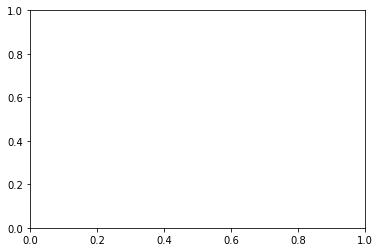

Streaming output truncated to the last 5000 lines.
 bias : 
 [[ 0.21431802]
 [ 1.00104883]
 [-0.03493381]
 [ 0.27275088]
 [ 0.5629735 ]
 [ 0.62113136]
 [ 0.85402607]
 [ 0.83783196]
 [-0.08128521]
 [-0.16455196]]

 Loss : 0.25339718254449195
accuracy  :  1.0
//////////// end of iteration
epoch : 413 
 weights : 
[[ 2.59531608e-01  2.23939271e-01  1.97122132e-02 ...  3.46712620e-01
   5.94271992e-01  5.93682958e-01]
 [ 7.25371471e-01  6.03957447e-01  8.57198443e-02 ...  5.51424718e-01
   1.20634083e-01  2.86131738e-02]
 [ 5.34064916e-01 -5.76353847e-02  1.18120932e-01 ...  2.50980870e-03
   7.80964223e-01  7.46368429e-01]
 ...
 [ 8.70156905e-04  1.73028031e-02  3.09577438e-01 ...  8.17183138e-01
   5.94124732e-01  8.60864388e-01]
 [ 8.29845707e-02  2.15210460e-01  2.54660187e-01 ...  7.74081234e-01
   8.17049186e-01  5.79477714e-01]
 [ 3.62958989e-01  4.50598685e-01  7.40287006e-01 ...  7.27575150e-01
   8.02181066e-01  8.71946455e-01]] 
 bias : 
 [[ 0.21431802]
 [ 1.00104883]
 [-0.03493

In [26]:
weights = np.random.random((10,784))
bias = np.random.random((10,1))
Layer1 = Linear(train_data, weights, bias, 'softmax')
my_Model4 = Model([Layer1])


# Layer1()
my_Loss = my_Model4.Loss(train_labels, Layer1.output()).CrossEntropy()
opt = my_Model4.Optimization(500, my_Loss, 0.1, 0.02,'Batch').GradientDescent()

In [27]:
my_Model4.Evaluate(train_data, train_labels, True)


Y_Hat : [[ 8.60893593e-03  5.27327679e-02  1.63803298e-01 -4.28762410e-01
   2.55692984e-01  7.14209078e-03  8.18526288e-04  3.67913671e-03
   1.57183353e-03  1.39640893e-02  1.93946207e-02  8.32825868e-03
   1.39227718e-03  1.55322549e-02  2.52151696e-02 -6.26849559e-02
   1.62604667e-01 -2.94522528e-01  1.17243205e-01  9.06506520e-03
   1.81228549e-02  1.68055118e-02  3.48897833e-03  3.75794565e-03
   3.79233960e-03  1.30146804e-03  7.02669321e-02  3.60884878e-02
   9.56152837e-02 -3.40567511e-01  2.42783917e-01  1.49374815e-01
  -3.48840169e-01  9.48724996e-02  6.16893774e-02  4.23733003e-02
   1.53883952e-01 -2.80457423e-01  3.48629032e-02  4.64302414e-03
   2.30914732e-03  1.80941910e-03  1.65516548e-02 -1.67419315e-01
   5.25011059e-02  1.06666285e-01  6.44465765e-02  3.70307006e-02
   9.11392787e-02 -2.70840913e-01  1.27292821e-01  2.85752159e-02
   1.09936102e-02  2.30213691e-02 -3.44154832e-01  6.10550007e-02
   1.24813117e-01 -2.44487067e-01  6.37017473e-02  7.46716137e-02
  

(array([[ 8.60893593e-03,  5.27327679e-02,  1.63803298e-01,
         -4.28762410e-01,  2.55692984e-01,  7.14209078e-03,
          8.18526288e-04,  3.67913671e-03,  1.57183353e-03,
          1.39640893e-02,  1.93946207e-02,  8.32825868e-03,
          1.39227718e-03,  1.55322549e-02,  2.52151696e-02,
         -6.26849559e-02,  1.62604667e-01, -2.94522528e-01,
          1.17243205e-01,  9.06506520e-03,  1.81228549e-02,
          1.68055118e-02,  3.48897833e-03,  3.75794565e-03,
          3.79233960e-03,  1.30146804e-03,  7.02669321e-02,
          3.60884878e-02,  9.56152837e-02, -3.40567511e-01,
          2.42783917e-01,  1.49374815e-01, -3.48840169e-01,
          9.48724996e-02,  6.16893774e-02,  4.23733003e-02,
          1.53883952e-01, -2.80457423e-01,  3.48629032e-02,
          4.64302414e-03,  2.30914732e-03,  1.80941910e-03,
          1.65516548e-02, -1.67419315e-01,  5.25011059e-02,
          1.06666285e-01,  6.44465765e-02,  3.70307006e-02,
          9.11392787e-02, -2.70840913e-0

###### here we made the labels have a variance from training labels to simulate actual testing labels , but we put the same inputs as the model predictied the random relation between these two sets of numbers


#### Note that in the first example , we used momentum instead of gradient descent which converges faster

#### Also note that we may increase epochs size to convgere faster